In [8]:
# !pip install pygmo

In [9]:
import pygmo as pg
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D

### Функция Бута: $f(x, y)=(x + 2y - 7)^2 + (2x + y - 5)^2$

### Глобальный минимум: $f(1, 3) = 0$

### Метод поиска: $-10 \leq x, y \leq 10$

In [10]:
class func_but:
    def fun(self, start):
        return (start[0] + 2 * start[1] - 7) * (start[0] + 2 * start[1] - 7) + (2 * start[0] + start[1] - 5) * (2 * start[0] + start[1] - 5)

    def create_net(self):
        return ([-10, -10], [10, 10])
    
def but(x, y):
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)

### Функция Химмельблау: $f(x, y)=(x^2 + y - 11)^2 + (x + y^2 - 7)^2$

### Глобальный минимум: $\begin{equation*}
Min = 
 \begin{cases}
   f(3.0, 2.0) = 0.0\\
   f(-2.805118, 3.131312) = 0.0\\
   f(-3.77931, -3.283186) = 0.0\\
   f(3.584428, -1.848126) = 0.0
 \end{cases}
\end{equation*}$

### Метод поиска: $-5 \leq x, y \leq 5$

In [11]:
class func_him:
    def fun(self, start):
        return (start[0] * start[0]  + start[1] - 11) * (start[0] * start[0]  + start[1] - 11) + (start[0] + start[1] * start[1] - 7) * (start[0] + start[1] * start[1] - 7)

    def create_net(self):
        return ([-10, -10], [10, 10])

def him(x, y):
    return (x * x  + y - 11) * (x * x  + y - 11) + (x + y * y - 7) * (x + y * y - 7)

### Функция построения графиков работы заданных алгоритмов

In [12]:
def plot_graphics(x_min, x_max, y_min, y_max, step=0.1, population=None, f=None, image=None):
    xgrid = np.arange(x_min, x_max, step)
    ygrid = np.arange(y_min, y_max, step)
    xgrid, ygrid = np.meshgrid(xgrid, ygrid)
    if population is not None and f is not None:
        zgrid = f(xgrid, ygrid)
        fig = plt.figure(figsize=(7, 4))
        ax_3d = Axes3D(fig, auto_add_to_figure=True)
        ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma', alpha=0.5)
        ax_3d.scatter(population.champion_x[0], population.champion_x[1], population.champion_f[0], c='red')
#     elif image is not None and population is None:
#         fig = plt.figure(figsize=(7, 4))
#         ax_3d = Axes3D(fig, auto_add_to_figure=True)
#         ax_3d.plot_surface(xgrid, ygrid, image, cmap='plasma', alpha=0.5)
    else:
        fig = plt.figure(figsize=(7, 4))
        ax_3d = Axes3D(fig, auto_add_to_figure=True)
        ax_3d.plot_surface(xgrid, ygrid, image, cmap='plasma', alpha=0.5)
        ax_3d.scatter(population.champion_x[1], population.champion_x[0], population.champion_f[0], c='red')
    plt.show()

### Класс для создания проблемы

In [13]:
class func:
    def __init__(self, func):
        self.func = func

    def fitness(self, x):
        return [self.func.fun(x)]

    def get_bounds(self):
        return self.func.create_net()

### Функция для алгоритма gwo 

In [14]:
def gwo(f, func=func):
    problem = pg.problem(func(f()))
    algorithm = pg.algorithm(pg.gwo(gen=40))
    population = pg.population(problem, 100)
    population = algorithm.evolve(population)
    return population

### Функция для алгоритма sea

In [15]:
def sea(f, func=func):
    problem = pg.problem(func(f()))
    algorithm = pg.algorithm(pg.sea(gen=100))
    population = pg.population(problem, 1000)
    population = algorithm.evolve(population)
    return population

### Тестирование gwo

#### Нахождение минимума для функции Бута

In [16]:
population = gwo(func_but)
plot_graphics(x_min=-10, x_max=10, y_min=-10, y_max=10, step=0.1, population=population, f=but, image=None)
print(f'Найденное значение функции: {population.champion_f}')
print(f'Значение найденной точки: {population.champion_x}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Найденное значение функции: [2.69912603e-07]
Значение найденной точки: [1.00028753 2.99961435]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


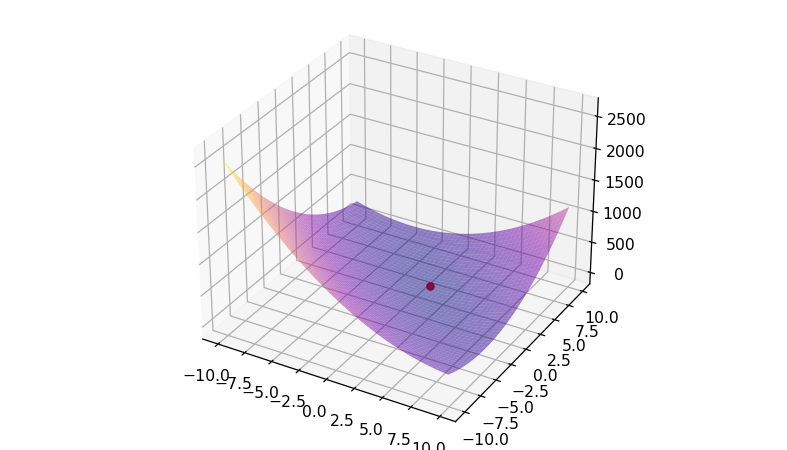

#### Нахождение минимума для функции Химмельблау

In [17]:
population = gwo(func_him)
plot_graphics(x_min=-10, x_max=10, y_min=-10, y_max=10, step=0.1, population=population, f=him, image=None)
print(f'Найденное значение функции: {population.champion_f}')
print(f'Значение найденной точки: {population.champion_x}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


Найденное значение функции: [5.07290527e-06]
Значение найденной точки: [2.99961805 2.00004746]


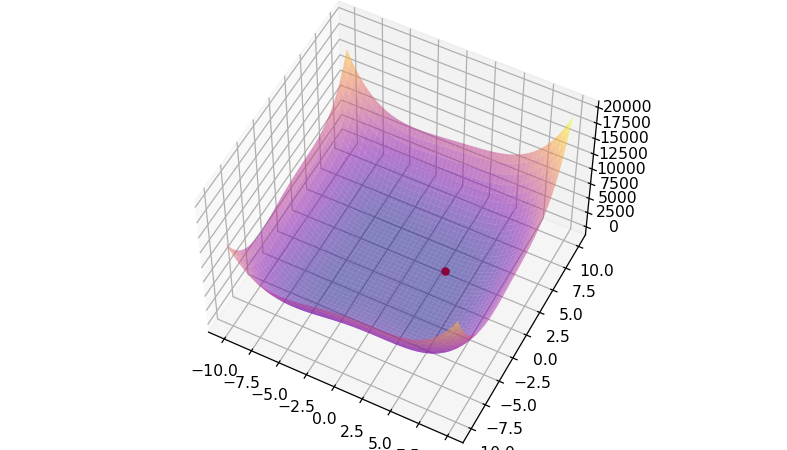

### Тестирование sea

#### Нахождение минимума для функции Бута

In [18]:
population = sea(func_but)
plot_graphics(x_min=-10, x_max=10, y_min=-10, y_max=10, step=0.1, population=population, f=but, image=None)
print(f'Найденное значение функции: {population.champion_f}')
print(f'Значение найденной точки: {population.champion_x}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Найденное значение функции: [0.00884911]
Значение найденной точки: [0.95270015 3.00678506]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


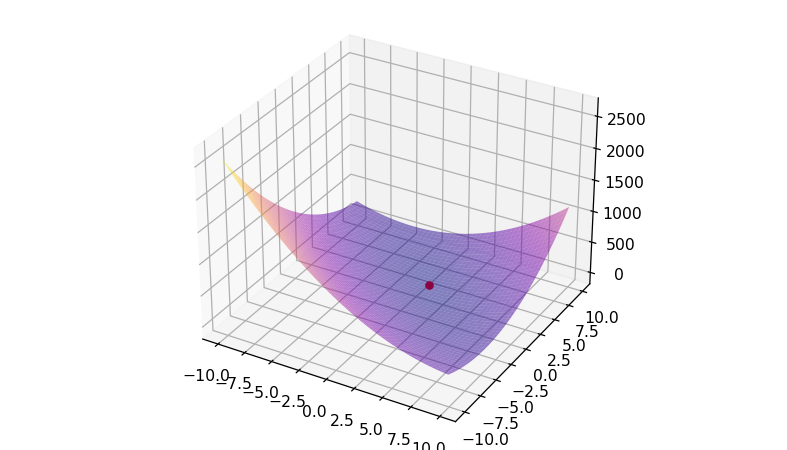

#### Нахождение минимума для функции Химмельблау

In [19]:
population = sea(func_him)
plot_graphics(x_min=-10, x_max=10, y_min=-10, y_max=10, step=0.1, population=population, f=him, image=None)
print(f'Найденное значение функции: {population.champion_f}')
print(f'Значение найденной точки: {population.champion_x}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Найденное значение функции: [0.88426495]
Значение найденной точки: [-2.79422917  2.97963663]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


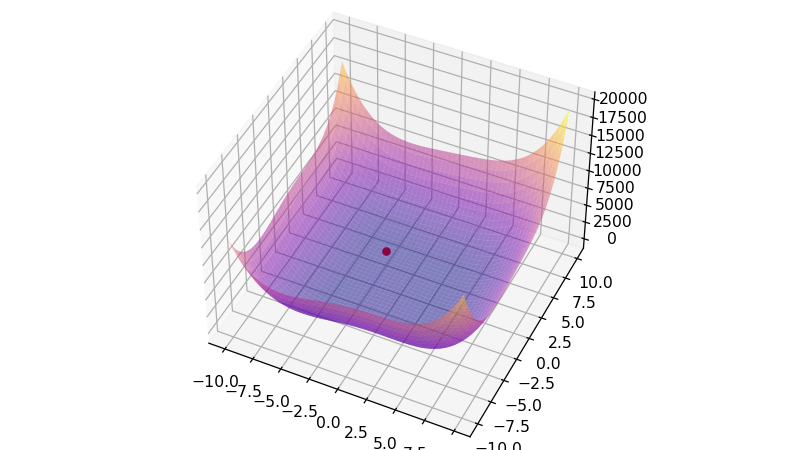

### Вторая часть 

#### Чтение изображения

In [20]:
image = cv2.imread('../input/lr2pygmo/vibe_of_the_magistracy.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

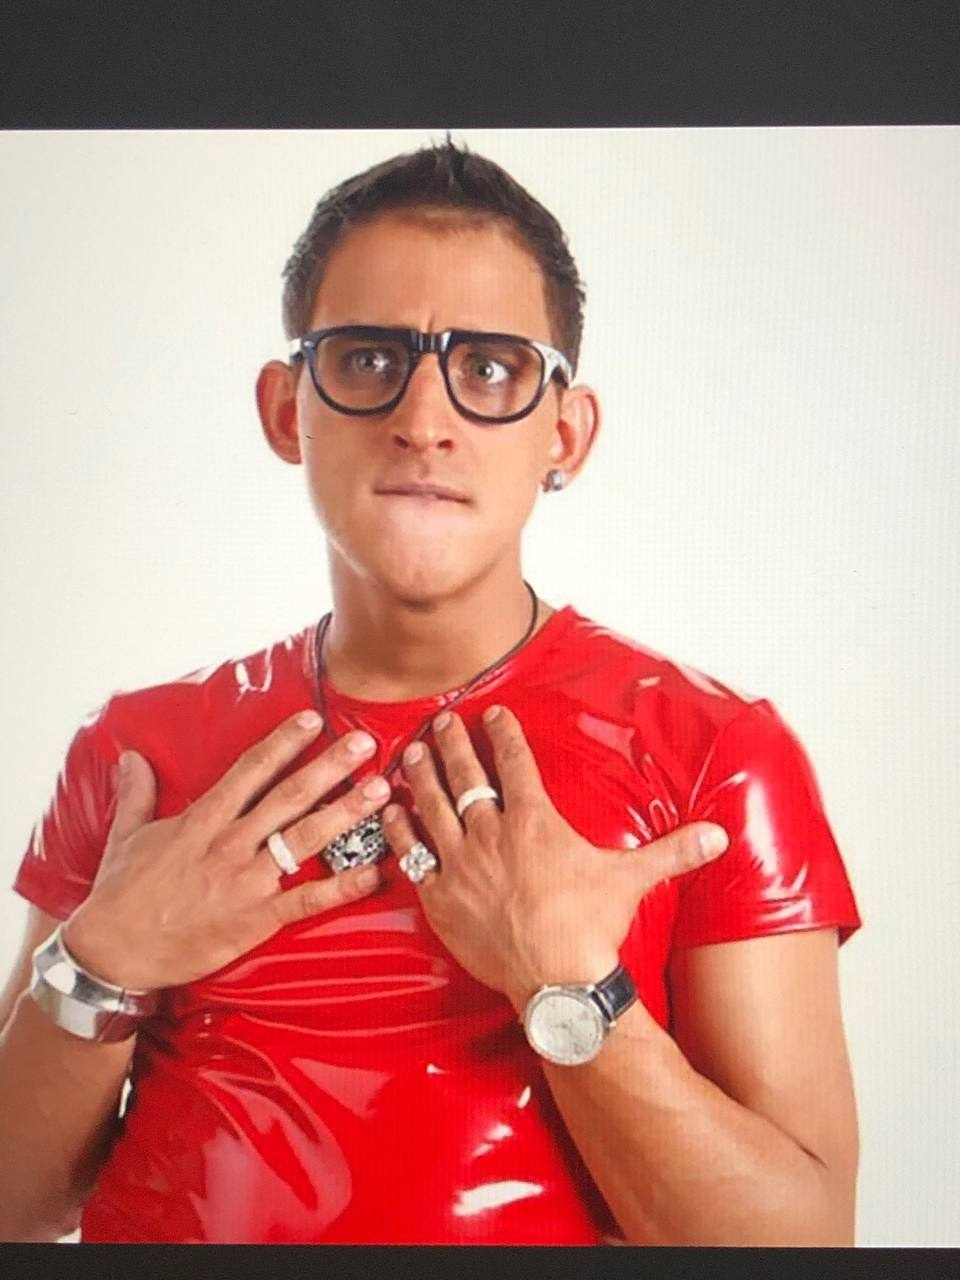

### Класс для нахождения минимума на изображении

In [21]:
class work_2:
    def __init__(self, image):
        self.image = image
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.image[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.image.shape[0]-1, self.image.shape[1]-1])

In [22]:
def w_2():
    problem = pg.problem(work_2(image))
    algorithm = pg.algorithm(pg.sea(gen=800))
    population = pg.population(problem, 10000)
    population = algorithm.evolve(population)
    return population

### Ищем минимум на изображении

In [23]:
population = w_2()
plot_graphics(x_min=0, x_max=960, y_min=0, y_max=1280, step=1, population=population, f=None, image=image)
print(f'Найденное значение функции: {population.champion_f}')
print(f'Значение найденной точки: {population.champion_x}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Найденное значение функции: [25.]
Значение найденной точки: [1141.81266697  109.52380998]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


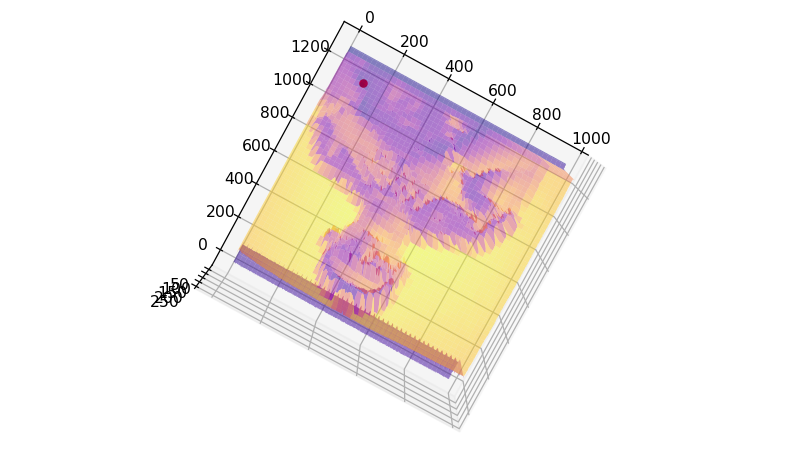